# <center>SFML/INFO-F422: Statistical foundations of machine learning</center>

# <center>Regression Part</center>

Name: Mathieu Parmentier & Nini

Python version: 3.6

Date: XXXXX


## Introduction

THe curse of dimentionality is a term invented in 1961 by R.Bellman that refer to the fact that as a number of features or dimensions grows, the amount of data needed to generalize accurately a model groth exponentially.


# Objective and strategy 

## Material and method

### Synthetic data set:

We chose a cubic function to generate our synthetic data set. This function has only one variable and has not noise. This function, although basic, is slightly complex and will allow us to evaluate our good mastery of the algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_col = 1
n_row = 50
np.random.seed()
X = np.random.random((n_row,n_col))
Y = np.ones(n_row)
#X = X*1000


for i in range(len(X)):
    X[i][0]=i-n_row/2
    Y[i]= (X[i][0])**3

Let's explore our dataset to make sure that the generation has passed properly.

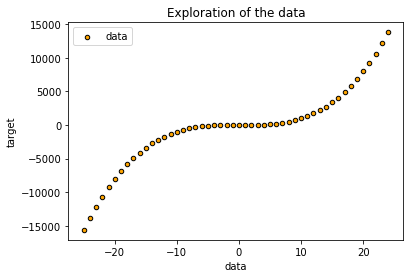

In [2]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Exploration of the data")
plt.legend()
plt.show()


Now, we're going to divide our data into a test set and a training set.We will also load libraries shared by different algorithms and we will build a scoring function based on negative mean squared error to guide the optimization of our models.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 25)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score, max_error, r2_score
import pandas as pd

### 1) Algorithm : Support vector machine (Regression)

code

In [5]:
from sklearn.svm import SVR


# Default setting
svm_r = SVR()
svm_r.fit(x_train, y_train)
print("Our support vector with default settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, svm_r.predict(x_train))))
print("Our support vector with default settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, svm_r.predict(x_test))))
print()
print("let's try to optimize the model")


# Optimization test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
# Where C is Regularization parameter
svm_ropt = GridSearchCV(SVR(), param_grid, cv=5, verbose=0)
svm_ropt.fit(x_train, y_train)
print('The optimize settings are',svm_ropt.best_params_)
svm_ropt = SVR(C = svm_ropt.best_params_['C'],kernel = svm_ropt.best_params_['kernel'])
svm_ropt.fit(x_train, y_train)
print("Our support vector with optimize settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, svm_ropt.predict(x_train))))
print("Our support vector with optimize settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, svm_ropt.predict(x_test))))
print("it'is much better")
print()
print("We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset")
print("R²:",r2_score(Y, svm_ropt.predict(X)))
print("Explained variance score :",explained_variance_score(Y, svm_ropt.predict(X)))
print("Median absolute error :",median_absolute_error(Y, svm_ropt.predict(X)))
print("Maximum error :",max_error(Y, svm_ropt.predict(X)))

Our support vector with default settings has an in-sample error equal to 6196.7154490691155
Our support vector with default settings has an out-sample error equal to 4610.2637149356315

let's try to optimize the model
The optimize settings are {'C': 1000, 'kernel': 'poly'}
Our support vector with optimize settings has an in-sample error equal to 0.04182847020618212
Our support vector with optimize settings has an out-sample error equal to 0.03440204257050222
it'is much better

We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset
R²: 0.9999999999532121
Explained variance score : 0.9999999999536846
Median absolute error : 0.014123591619863873
Maximum error : 0.10027158386219526


Plot of the results:

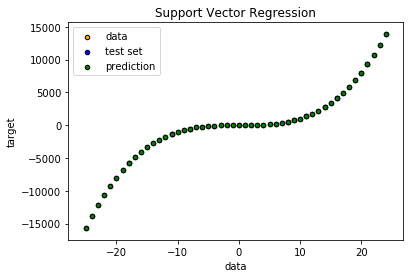

The model parameters: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [6]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], svm_ropt.predict(X), s=20, edgecolor="black",c="green", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

print("The model parameters:",svm_ropt)


### 2) Algorithm : Decision Tree Regression 

code

In [76]:
from sklearn.tree import DecisionTreeRegressor


# Default setting
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)


print("Our DecisionTreeRegressor with default settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, DTR.predict(x_train))))
print("Our DecisionTreeRegressor with default settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, DTR.predict(x_test))))
print()
print("let's try to optimize the model")


# Optimization test
param_grid = {"criterion": ["mse", "mae"],"max_depth": [2, 3, 4, 8, 10, 20],"min_samples_split": [2, 3, 5, 8, 10, 20, 40],"min_samples_leaf": [2, 5, 10, 15, 20, 40, 100],"max_leaf_nodes": [2, 5, 10,15, 20,40, 100]}
DTR_opt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=0)
DTR_opt.fit(x_train, y_train)
print('The optimize settings are',DTR_opt.best_params_)
DTR_opt = DecisionTreeRegressor(criterion = DTR_opt.best_params_['criterion'],max_depth = DTR_opt.best_params_['max_depth'],min_samples_split = DTR_opt.best_params_['min_samples_split'],min_samples_leaf = DTR_opt.best_params_['min_samples_leaf'],max_leaf_nodes = DTR_opt.best_params_['max_leaf_nodes'])
DTR_opt.fit(x_train, y_train)
print("Our support vector with optimize settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, svm_ropt.predict(x_train))))
print("Our support vector with optimize settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, svm_ropt.predict(x_test))))
print("it'is much better")
print()
print("We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset")
print("R²:",r2_score(Y, DTR_opt.predict(X)))
print("Explained variance score :",explained_variance_score(Y, DTR_opt.predict(X)))
print("Median absolute error :",median_absolute_error(Y, DTR_opt.predict(X)))
print("Maximum error :",max_error(Y, DTR_opt.predict(X)))

Our DecisionTreeRegressor with default settings has an in-sample error equal to 0.0
Our DecisionTreeRegressor with default settings has an out-sample error equal to 742.676914950236

let's try to optimize the model
The optimize settings are {'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Our support vector with optimize settings has an in-sample error equal to 283048.1379853052
Our support vector with optimize settings has an out-sample error equal to 280481.36691732047
it'is much better

We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset
R²: 0.9814634705637169
Explained variance score : 0.9815670433211227
Median absolute error : 328.5
Maximum error : 2952.0


Plot of the results

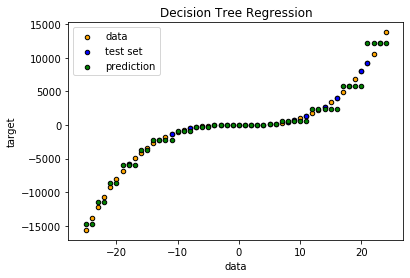

The model parameters: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [77]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], DTR_opt.predict(X), s=20, edgecolor="black",c="green", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
print("The model parameters:",DTR_opt)

### 3) Algorithm : Neural network Regression  

code

In [75]:
from sklearn.neural_network import MLPRegressor
import warnings

# Default setting

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    NNR = MLPRegressor()
    NNR.fit(x_train, y_train)
    print("Our DecisionTreeRegressor with default settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, NNR.predict(x_train))))
    print("Our DecisionTreeRegressor with default settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, NNR.predict(x_test))))
    print()
    print("let's try to optimize the model")
    
    # Optimization test
    param_grid = {"hidden_layer_sizes": [(i,i) for i in range(1,25)], "alpha": [0.00005,0.0001,0.0005],"activation" : ['logistic', 'tanh', 'relu']}
    NNR_opt = GridSearchCV(MLPRegressor(solver = "lbfgs"), param_grid, cv=5, verbose=0)
    NNR_opt.fit(x_train, y_train)
    print('The optimize settings are',NNR_opt.best_params_)
    NNR_opt = MLPRegressor(hidden_layer_sizes = NNR_opt.best_params_['hidden_layer_sizes'],alpha = NNR_opt.best_params_['alpha'],activation = NNR_opt.best_params_['activation'], solver = "lbfgs")
    NNR_opt.fit(x_train, y_train)
    
    #param_grid = {"hidden_layer_sizes": [(i,i) for i in range(1,25)], "alpha": [0.00005,0.0001,0.0005], "learning_rate" : ['constant', 'invscaling','adaptive'],"activation" : ['logistic', 'tanh', 'relu']}
    #NNR_opt = GridSearchCV(MLPRegressor(solver = "lbfgs"), param_grid, cv=5, verbose=0)
    #NNR_opt.fit(x_train, y_train)
    #print('The optimize settings are',NNR_opt.best_params_)
    #NNR_opt = MLPRegressor(hidden_layer_sizes = NNR_opt.best_params_['hidden_layer_sizes'],alpha = NNR_opt.best_params_['alpha'],learning_rate = NNR_opt.best_params_['learning_rate'],activation = NNR_opt.best_params_['activation'], solver = "lbfgs")
    #NNR_opt.fit(x_train, y_train)
    
    
    
    
print("Our support vector with optimize settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, NNR_opt.predict(x_train))))
print("Our support vector with optimize settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, NNR_opt.predict(x_test))))
print("it'is much better")
print()
print("We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset")
print("R²:",r2_score(Y, NNR_opt.predict(X)))
print("Explained variance score :",explained_variance_score(Y, NNR_opt.predict(X)))
print("Median absolute error :",median_absolute_error(Y, NNR_opt.predict(X)))
print("Maximum error :",max_error(Y, NNR_opt.predict(X)))

Our DecisionTreeRegressor with default settings has an in-sample error equal to 6145.266598583775
Our DecisionTreeRegressor with default settings has an out-sample error equal to 4550.942795638461

let's try to optimize the model
The optimize settings are {'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (21, 21)}
Our support vector with optimize settings has an in-sample error equal to 73.45369117934796
Our support vector with optimize settings has an out-sample error equal to 153.73999812534308
it'is much better

We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset
R²: 0.9997414264763331
Explained variance score : 0.9997423318837859
Median absolute error : 54.17828838130913
Maximum error : 262.62533621461716


Plot of the results

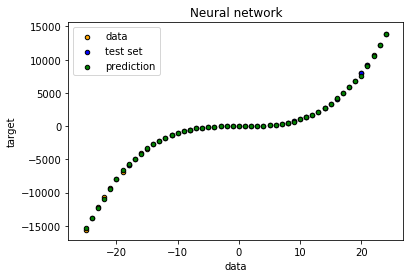

The model parameters: MLPRegressor(activation='relu', alpha=5e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(24, 24), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=100000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


In [11]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], NNR_opt.predict(X), s=20, edgecolor="black",c="green", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Neural network")
plt.legend()
plt.show()
print("The model parameters:",NNR_opt)

### 4) Algorithm : K Nearest neighbors regression

code

In [79]:
from sklearn import neighbors


# Default setting
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train, y_train)


print("Our DecisionTreeRegressor with default settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, knn.predict(x_train))))
print("Our DecisionTreeRegressor with default settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, knn.predict(x_test))))
print()
print("let's try to optimize the model")


# Optimization test
param_grid = {"n_neighbors": [2,3,4,5,6,7,8,9],"leaf_size": [2,5,10,20,30,50,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
knn_opt = GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, verbose=0)
knn_opt.fit(x_train, y_train)
print('The optimize settings are',knn_opt.best_params_)
knn_opt = neighbors.KNeighborsRegressor(n_neighbors = knn_opt.best_params_['n_neighbors'],leaf_size = knn_opt.best_params_['leaf_size'],weights = knn_opt.best_params_['weights'],metric = knn_opt.best_params_['metric'])
knn_opt.fit(x_train, y_train)
print("Our support vector with optimize settings has an in-sample error equal to",np.sqrt(mean_squared_error(y_train, knn_opt.predict(x_train))))
print("Our support vector with optimize settings has an out-sample error equal to",np.sqrt(mean_squared_error(y_test, knn_opt.predict(x_test))))
print("it'is much better")
print()
print("We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset")
print("R²:",r2_score(Y, knn_opt.predict(X)))
print("Explained variance score :",explained_variance_score(Y, knn_opt.predict(X)))
print("Median absolute error :",median_absolute_error(Y, knn_opt.predict(X)))
print("Maximum error :",max_error(Y, knn_opt.predict(X)))

Our DecisionTreeRegressor with default settings has an in-sample error equal to 985.6838768083812
Our DecisionTreeRegressor with default settings has an out-sample error equal to 432.20620541588704

let's try to optimize the model
The optimize settings are {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Our support vector with optimize settings has an in-sample error equal to 0.0
Our support vector with optimize settings has an out-sample error equal to 761.5727732061388
it'is much better

We can also compute the R², the explained variance score, the median absolute error and the maximum error for all the dataset
R²: 0.9966833643075932
Explained variance score : 0.996686504581432
Median absolute error : 0.0
Maximum error : 1893.333333333334


Plot of the results

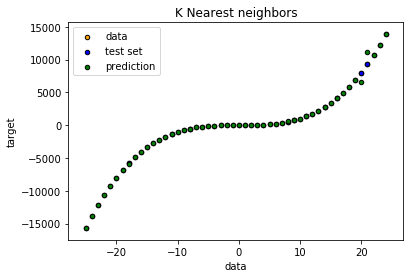

The model parameters: KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='distance')


In [80]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], knn_opt.predict(X), s=20, edgecolor="black",c="green", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("K Nearest neighbors")
plt.legend()
plt.show()
print("The model parameters:",knn_opt)

## Cross Validation

We try to optimize our model the best that we can do. Now, we would like to compare our models between each either to know which one seem to fit the best. 

In [81]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(x_train, y_train)


models = [linr,svm_ropt,DTR_opt,NNR_opt,knn_opt]
models_label = ['Linear regression','Support Vector Machine (Regression)','Decision Tree Regression','Neural network Regression','K Nearest neighbors']
cv = [2,3,4,5,6,8,10,20]
R2 = []
Fittime = [] 

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    for j in cv:
        R2_cv = []
        fittime_cv = []
        for i in range(len(models)):
            score = cross_validate(models[i], X, Y, cv=j)
            R2_cv.append(np.mean(score['test_score']))
            fittime_cv.append(np.mean(score['fit_time']))
            
        R2.append(R2_cv)
        Fittime.append(fittime_cv)

header = models_label
table = R2
print()
print('R² mean of all models for different cv:')
pd.DataFrame(table, columns = header,index = cv)


R² mean of all models for different cv:


,Linear regression,Support Vector Machine (Regression),Decision Tree Regression,Neural network Regression,K Nearest neighbors
2,-1.310450,1.000000,-0.781387,-2.193424,-0.780888
3,-17.720828,1.000000,-4.852670,-8.574589,-3.707021
4,-12.777181,1.000000,-3.449996,-2.005141,-2.340941
5,-108.378400,1.000000,-14.649392,-3.366922,-4.241267
6,-61.840816,1.000000,-3.378730,-0.006628,-2.683909
8,-164.796384,1.000000,-4.969236,0.157883,-2.928260
10,-252.240978,1.000000,-4.241073,0.029106,-2.948833
20,-8816.433664,0.999997,-9.759456,-23.711607,-11.249864


RMQ: 0 signifique le model predit bien y mais qu'il s'en fou des input (model est indepandant des donné). score négatif sinfique le model est dégeulase. check https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

In [82]:
header = models_label
table = Fittime
print()
print('Time of fit for all models in function of cv:')
pd.DataFrame(table, columns = header,index = cv)


Time of fit for all models in function of cv:


,Linear regression,Support Vector Machine (Regression),Decision Tree Regression,Neural network Regression,K Nearest neighbors
2,0.00050,0.000500,0.000000,0.115509,0.000499
3,0.00100,0.000667,0.000322,0.114333,0.000667
4,0.00025,0.000000,0.001000,0.091250,0.000499
5,0.00100,0.000200,0.000000,0.114302,0.000402
6,0.00000,0.000500,0.000833,0.116000,0.000167
8,0.00075,0.000126,0.000000,0.104117,0.000374
10,0.00050,0.000900,0.000000,0.110099,0.000500
20,0.00050,0.000100,0.000100,0.106801,0.000400


## How the size of the training set influance the algorithm efficiency 

In [83]:
def measurement(model,test_size,X,Y):
    ''' Measure the training efficiency for a particular training size'''
    measure = []
    for i in range(len(test_size)):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size[i], random_state = 25)
        model.fit(x_train, y_train)
        E_in = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
        E_out = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
        EV = explained_variance_score(Y, model.predict(X))
        R2 = model.score(X,Y)
        ME = median_absolute_error(Y, model.predict(X))
        MAE = max_error(Y, model.predict(X))
        measure.append([E_in,E_out,EV,R2,ME,MAE])
    return measure
 

test_size = [0.05,0.1,0.15,0.2,0.25,0.33,0.4,0.5,0.7,0.9,0.95]
stat = ['E_in','E_out','EV','R²','ME','MAE']
resume = []

In [84]:
header = stat
table = measurement(linr,test_size,X,Y)
print()
print('Linear regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Linear regression error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,2.400434e+03,1877.170345,0.839091,0.839090,2164.821471,6074.913494
0.10,2.405258e+03,2076.415212,0.838805,0.838801,2179.763819,5928.285223
0.15,2.380481e+03,2400.255558,0.837596,0.837545,2159.983232,5766.759081
0.20,2.400758e+03,2362.369853,0.836598,0.836251,2199.295748,5722.186324
0.25,2.346628e+03,2467.250692,0.838858,0.838237,2160.813770,6103.370718
0.33,2.400763e+03,2368.858166,0.837525,0.836685,2152.842492,5886.952227
0.40,2.427429e+03,2357.664691,0.835548,0.835342,2242.399249,5601.042174
0.50,2.281541e+03,2502.235438,0.837935,0.836073,2231.665823,6026.273013
0.70,2.069309e+03,2698.467882,0.817642,0.817531,2440.210093,4581.759223
0.90,1.400879e+03,2495.262216,0.839083,0.834168,2088.546954,6581.535502


In [85]:
header = stat
table = measurement(svm_ropt,test_size,X,Y)
print()
print('Support Vector Machine (Regression) error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Support Vector Machine (Regression) error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,0.040025,0.045152,1.0,1.0,0.014102,0.100031
0.10,0.040661,0.038174,1.0,1.0,0.014003,0.100204
0.15,0.041972,0.030620,1.0,1.0,0.014046,0.100031
0.20,0.041828,0.034402,1.0,1.0,0.014124,0.100272
0.25,0.038563,0.045017,1.0,1.0,0.014131,0.100031
0.33,0.040095,0.040636,1.0,1.0,0.013816,0.100056
0.40,0.041969,0.037831,1.0,1.0,0.014169,0.100114
0.50,0.042469,0.043049,1.0,1.0,0.014170,0.112817
0.70,0.050276,0.039409,1.0,1.0,0.014236,0.113342
0.90,0.064037,0.075354,1.0,1.0,0.027176,0.186686


In [86]:
header = stat
table = measurement(DTR_opt,test_size,X,Y)
print()
print('Decision Tree Regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Decision Tree Regression error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,543.480548,1690.237878,0.987405,0.987160,315.500000,2208.000000
0.10,548.340993,1388.946867,0.987144,0.986747,237.500000,2208.000000
0.15,565.783110,1162.463304,0.986424,0.986130,315.500000,2208.000000
0.20,610.498376,1323.148715,0.981567,0.981463,328.500000,2952.000000
0.25,648.051803,1498.911148,0.974516,0.974412,331.583333,2975.000000
0.33,684.262004,1338.023558,0.973963,0.973760,356.500000,2975.000000
0.40,779.426206,1252.112773,0.971765,0.971648,439.583333,2975.000000
0.50,1133.715493,1925.472374,0.929631,0.928624,408.500000,5530.666667
0.70,1652.126058,2263.899337,0.874333,0.874009,756.000000,6245.500000
0.90,3619.890565,4420.765825,0.463533,0.459633,2329.500000,11540.000000


In [87]:
header = stat
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    table = measurement(NNR_opt,test_size,X,Y)
print()
print('Neural network Regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Neural network Regression error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,92.503922,246.153468,0.999669,0.999666,49.377582,404.562451
0.10,58.909314,145.747037,0.999854,0.999850,42.478371,228.759727
0.15,114.661668,217.268015,0.999482,0.999468,69.338012,394.293558
0.20,61.899491,100.953865,0.999854,0.999854,45.775350,180.428505
0.25,25.543906,149.908253,0.999827,0.999819,23.112535,393.846236
0.33,81.837706,248.599753,0.999280,0.999273,51.390521,791.980855
0.40,55.623920,119.574975,0.999799,0.999783,29.173200,334.143879
0.50,39.822629,245.623887,0.999126,0.999115,50.654059,582.365340
0.70,202.291513,363.298936,0.997280,0.997007,230.324179,968.529781
0.90,0.000007,1758.809701,0.922321,0.920398,1153.003393,5036.989193


In [88]:
header = stat
table = measurement(knn_opt,test_size,X,Y)
print()
print('K Nearest neighbors error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


K Nearest neighbors error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,0.0,51.555795,0.999995,0.999995,0.000,63.000000
0.10,0.0,46.591845,0.999994,0.999994,0.000,63.000000
0.15,0.0,46.296598,0.999990,0.999990,0.000,63.000000
0.20,0.0,761.572773,0.996687,0.996683,0.000,1893.333333
0.25,0.0,556.431303,0.997705,0.997698,0.000,1483.333333
0.33,0.0,578.521606,0.996751,0.996746,0.000,1483.333333
0.40,0.0,556.363595,0.996479,0.996460,0.000,1483.333333
0.50,0.0,773.050545,0.991745,0.991457,3.000,2595.000000
0.70,0.0,706.345301,0.990020,0.990014,146.000,2595.000000
0.90,0.0,2655.358760,0.818772,0.818560,837.000,8189.642857


### Discusion

### Application on real data set

In [89]:
data = pd.read_csv('datasets_619175_1118179_housing_in_london_monthly_variables.csv')

data = data.dropna()

print("The data's dimension are", data.shape)
print('The features of the data are: ', list(data.columns))

The data's dimension are (7375, 7)
The features of the data are:  ['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes', 'borough_flag']


Let's explore our data

The correlation matrix shows the average price in function of all variables:
houses_sold     -0.305322
no_of_crimes     0.109721
average_price    1.000000
borough_flag          NaN
Name: average_price, dtype: float64


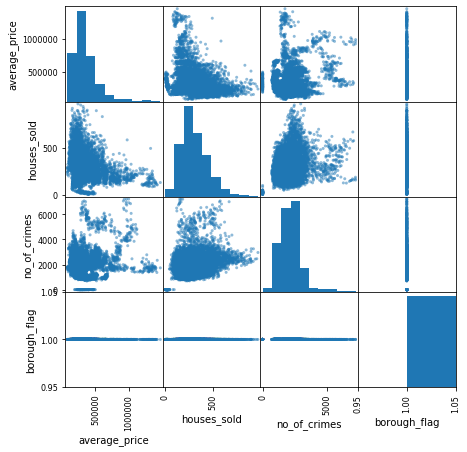

In [90]:
from pandas.plotting import scatter_matrix

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    corr_matrix = data.corr()
    print('The correlation matrix shows the average price in function of all variables:')
    print(corr_matrix['average_price'].sort_values())

    scatter_matrix(data[list(data.columns)], figsize=[len(list(data.columns)),len(list(data.columns))])
    plt.show()

Let's build our regression model

In [91]:
Yd = data['average_price']
Xd = data['houses_sold']

Yd = np.array(Yd)
Xd = np.array(Xd)
Xd.resize((len(Xd),1))

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    #Split set
    xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, Yd, test_size = 0.25, random_state = 25)
    #linr
    linrd = LinearRegression()
    linrd.fit(xd_train, yd_train)
    #SVMR
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
    svm_roptd = GridSearchCV(SVR(), param_grid, cv=5, verbose=0)
    svm_roptd.fit(xd_train, yd_train)
    #DTR
    param_grid = {"criterion": ["mse", "mae"],"max_depth": [2, 3, 4, 8, 10, 20],"min_samples_split": [2, 3, 5, 8, 10, 20, 40],"min_samples_leaf": [2, 5, 10, 15, 20, 40, 100],"max_leaf_nodes": [2, 5, 10,15, 20,40, 100]}
    DTR_optd = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=0)
    DTR_optd.fit(xd_train, yd_train)
    #NNR
    param_grid = {"hidden_layer_sizes": [(i,i) for i in range(1,25)], "alpha": [0.00005,0.0001,0.0005],"activation" : ['logistic', 'tanh', 'relu']}
    NNR_optd = GridSearchCV(MLPRegressor(solver = "lbfgs"), param_grid, cv=5, verbose=0)
    NNR_optd.fit(xd_train, yd_train)
    #Knn
    param_grid = {"n_neighbors": [2,3,4,5,6,7,8,9],"leaf_size": [2,5,10,20,30,50,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
    knn_optd = GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, verbose=0)
    knn_optd.fit(xd_train, yd_train)
    summary_r2 = [linrd.score(xd_test, yd_test),svm_roptd.score(xd_test, yd_test),DTR_optd.score(xd_test, yd_test),NNR_optd,knn_optd.score(xd_test, yd_test)]
    


Summary of the performance of all models on real data set:


TypeError: Index(...) must be called with a collection of some kind, 'R²' was passed

In [100]:
print(summary_r2[3])

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0001, 0.0005],
                         'hidden_layer_sizes': [(1, 1), (2, 2), (3, 3), (4, 4),
                                                (5, 5), (6, 6), (7, 7), (8, 8),
   

In [101]:
header = stat
table = measurement(linrd,test_size,Xd,Yd)
print()
print('Linear regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Linear regression error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,178692.598747,189928.596632,0.093221,0.093205,101209.515021,1.045976e+06
0.10,178871.905628,182829.820182,0.093218,0.093201,101265.393348,1.045701e+06
0.15,179800.114133,176237.789868,0.093222,0.093221,101616.560220,1.045434e+06
0.20,179315.888998,179101.135440,0.093193,0.093191,101381.845748,1.044356e+06
0.25,179202.605588,179477.203429,0.093214,0.093207,101956.770200,1.044220e+06
0.33,179527.387884,178750.274523,0.093208,0.093208,101665.850744,1.044367e+06
0.40,180756.311549,177026.056452,0.093211,0.093185,102027.661671,1.045197e+06
0.50,182039.160768,176493.773984,0.093221,0.093043,102854.297342,1.043026e+06
0.70,178974.034957,179429.940842,0.093032,0.092985,102326.404706,1.047447e+06
0.90,184522.205629,178698.500842,0.093080,0.093029,100960.217124,1.049636e+06


In [102]:
header = stat
table = measurement(svm_roptd,test_size,Xd,Yd)
print()
print('Support Vector Machine (Regression) error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


Support Vector Machine (Regression) error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,185906.308796,200637.911847,0.087641,0.016804,80479.735650,1.142072e+06
0.10,186495.404230,192688.666428,0.084884,0.012022,80383.950295,1.145965e+06
0.15,187803.968328,184413.832571,0.083384,0.010177,80341.619560,1.147524e+06
0.20,187129.818880,188653.292034,0.082546,0.008734,80331.031870,1.148919e+06
0.25,187174.240352,188283.323401,0.082043,0.008558,80310.333789,1.149722e+06
0.33,187546.197194,187234.130711,0.084192,0.008652,80397.895797,1.148357e+06
0.40,188639.571853,184353.018892,0.082854,0.014003,83238.180840,1.115622e+06
0.50,190077.508303,183481.634994,0.082786,0.015358,83317.847368,1.115187e+06
0.70,186338.165412,186020.625096,0.085512,0.022642,83877.778261,1.110079e+06
0.90,194082.416300,188469.154838,0.079268,-0.008284,81233.560000,1.125822e+06


In [103]:
header = stat
table = measurement(DTR_optd,test_size,Xd,Yd)
print()
print('Decision Tree Regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)

KeyboardInterrupt: 

In [105]:
header = stat
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    table = measurement(NNR_optd,test_size,Xd,Yd)
print()
print('Neural network Regression error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)

KeyboardInterrupt: 

In [104]:
header = stat
table = measurement(knn_optd,test_size,Xd,Yd)
print()
print('K Nearest neighbors error for different training size:')
pd.DataFrame(table, columns = header,index = test_size)


K Nearest neighbors error for different training size:


,E_in,E_out,EV,R²,ME,MAE
0.05,174301.419220,192047.553057,0.133642,0.133610,90675.666667,1.080972e+06
0.10,173907.331674,192232.989708,0.128114,0.127715,88821.333333,1.081139e+06
0.15,173600.665305,186732.063014,0.129771,0.129627,90112.666667,1.008635e+06
0.20,173423.220396,186659.387618,0.124527,0.124509,92052.222222,1.085822e+06
0.25,172835.883031,187497.633470,0.120043,0.119871,92633.777778,1.089261e+06
0.33,172384.253582,187475.547772,0.111026,0.110970,92121.000000,1.095321e+06
0.40,171989.325927,184442.319217,0.115300,0.115284,91829.333333,1.110685e+06
0.50,170318.030550,186958.644470,0.097903,0.097635,93650.333333,1.100244e+06
0.70,166033.527338,185649.720846,0.086006,0.085914,95047.111111,1.122682e+06
0.90,170594.002195,190040.102483,0.000781,0.000767,95258.111111,1.119427e+06


### Discusion

## Conclusion 

## Bibliography

 Lecture + ...

regression validation: https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/
regression validation : https://scikit-learn.org/stable/modules/model_evaluation.html

#####################################################"
https://www.youtube.com/watch?v=Gol_qOgRqfA
